# IS537 Final Project
### Ashwini Karkhanis, Himani Mehta, Adit Rathi

For this project we have opted for the NYC Airbnb dataset.
The source of this dataset is Kaggle (https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)


## Importing the required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn import preprocessing

## Reading the Data

In [2]:
data_url = 'https://raw.githubusercontent.com/ManarOmar/New-York-Airbnb-2019/master/AB_NYC_2019.csv'
airbnb = pd.read_csv(data_url)

## Exploratory Data Analysis

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
airbnb.shape

(48895, 16)

In [4]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Dealing with NULL values

We observe that when the number of reviews of a property are 0, its last review date and reviews per month are the only NULL values on those columns. We concude that they are new properties.
We will now add a new column named property type indicating if it is a new property or an exixting property

In [9]:
new_dict = {"number_of_reviews":[],"last_review":[],"reviews_per_month":[]};

In [10]:
for row in airbnb.iterrows():
    no_of_reviews = row[1]['number_of_reviews']
    last_review_date= row[1]['last_review']
    reviews_per_month = row[1]['reviews_per_month']
    if no_of_reviews == 0:
        #print(last_review_date)
        new_dict["number_of_reviews"].append(no_of_reviews)
        new_dict["last_review"].append(last_review_date)
        new_dict["reviews_per_month"].append(reviews_per_month)
    

In [11]:
new_df = pd.DataFrame.from_dict(new_dict)

In [12]:
new_df['number_of_reviews'].unique()

array([0], dtype=int64)

In [13]:
new_df['last_review'].unique()

array([nan])

In [14]:
new_df['reviews_per_month'].unique()

array([nan])

In [15]:
def prop_type(value):
    if value == 0:
        return 'New Property'
    else:
        return 'Existing Property'

In [16]:
airbnb_cpy =airbnb.copy()

In [17]:
airbnb_cpy['Property Type']= airbnb_cpy['number_of_reviews'].map(prop_type)

In [18]:
airbnb_cpy[airbnb_cpy['Property Type']=='New Property']['Property Type'].count()

10052

In [19]:
airbnb_cpy

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Property Type
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Existing Property
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Existing Property
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,New Property
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Existing Property
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Existing Property
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,New Property
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,New Property
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,New Property
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,New Property


In this step, we will replace all the NaN values in 'reviews_per_month' with 0 and all NaN values in 'last_review' with NA.

In [20]:

airbnb_cpy.fillna({'reviews_per_month':0}, inplace=True)

In [21]:

airbnb_cpy.fillna({'last_review':'NA'}, inplace=True)

In [22]:
airbnb_cpy

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Property Type
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Existing Property
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Existing Property
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NA,0.00,1,365,New Property
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Existing Property
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Existing Property
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NA,0.00,2,9,New Property
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NA,0.00,2,36,New Property
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NA,0.00,1,27,New Property
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NA,0.00,6,2,New Property


Since the missing data from the 'host_name' and the 'name' columns cannot be retrieved, we decided to drop the respective rows with NaN values.

In [23]:

airbnb_cpy.drop(['host_name','name'], axis=1, inplace=True)

In [24]:
airbnb_cpy.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Property Type                     0
dtype: int64

### Checking for and dealing with outliers

#### Co-ordinates 

Here we are checking if the given latitude and longitudes point to locations within New York by plotting all of the records on a map of the United States

In [25]:
BBox = (-106.743, -65.610, 51.727, 30.865)

In [26]:
us_m = plt.imread('map.jpg')

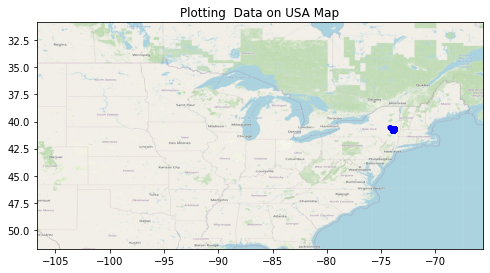

In [27]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(airbnb_cpy.longitude, airbnb_cpy.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting  Data on USA Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(us_m, zorder=0, extent = BBox, aspect= 'equal')

#### Price

Here, we have explored all the lisitngs with price 0. In order to fix this, we have taken the average price of the listings in that neighbourhood and replaced the 0 with it.

In [28]:
airbnb_cpy[airbnb_cpy['price']==0]['price'].count()

11

In [29]:
price_0=airbnb_cpy[airbnb_cpy['price']==0]

In [30]:
price_0

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Property Type
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28,Existing Property
25433,20333471,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127,Existing Property
25634,20523843,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0,Existing Property
25753,20608117,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0,Existing Property
25778,20624541,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73,Existing Property
25794,20639628,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176,Existing Property
25795,20639792,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232,Existing Property
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222,Existing Property
26259,20933849,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NA,0.00,1,0,New Property
26841,21291569,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333,Existing Property


In [31]:
price_0['neighbourhood'].unique()

array(['Bedford-Stuyvesant', 'East Morrisania', 'Bushwick', 'Greenpoint',
       'Williamsburg', 'Murray Hill'], dtype=object)

Replacing price with mean of that neighbourhood

In [32]:
Bedford_Stuyvesant = airbnb_cpy[airbnb_cpy['neighbourhood'] =='Bedford-Stuyvesant']['price'].mean()

In [33]:
East_Morrisania = airbnb_cpy[airbnb_cpy['neighbourhood'] =='East Morrisania']['price'].mean()

In [34]:
Bushwick = airbnb_cpy[airbnb_cpy['neighbourhood'] =='Bushwick']['price'].mean()

In [35]:
Greenpoint = airbnb_cpy[airbnb_cpy['neighbourhood'] =='Greenpoint']['price'].mean()

In [36]:
Williamsburg = airbnb_cpy[airbnb_cpy['neighbourhood'] =='Williamsburg']['price'].mean()

In [37]:
Murray_Hill = airbnb_cpy[airbnb_cpy['neighbourhood'] =='Murray Hill']['price'].mean()

In [38]:
airbnb_cpy_2 =airbnb_cpy.copy()

In [39]:
airbnb_cpy_2['price'] = np.where((airbnb_cpy_2['price'] == 0) & (airbnb_cpy_2['neighbourhood'] == 'Bedford-Stuyvesant'), Bedford_Stuyvesant, airbnb_cpy_2['price'])

In [40]:
airbnb_cpy_2['price'] = np.where((airbnb_cpy_2['price'] == 0) & (airbnb_cpy_2['neighbourhood'] == 'East Morrisania'), East_Morrisania, airbnb_cpy_2['price'])

In [41]:
airbnb_cpy_2['price'] = np.where((airbnb_cpy_2['price'] == 0) & (airbnb_cpy_2['neighbourhood'] == 'Bushwick'), Bushwick, airbnb_cpy_2['price'])

In [42]:
airbnb_cpy_2['price'] = np.where((airbnb_cpy_2['price'] == 0) & (airbnb_cpy_2['neighbourhood'] == 'Greenpoint'), Greenpoint, airbnb_cpy_2['price'])

In [43]:
airbnb_cpy_2['price'] = np.where((airbnb_cpy_2['price'] == 0) & (airbnb_cpy_2['neighbourhood'] == 'Williamsburg'), Williamsburg, airbnb_cpy_2['price'])

In [44]:
airbnb_cpy_2['price'] = np.where((airbnb_cpy_2['price'] == 0) & (airbnb_cpy_2['neighbourhood'] == 'Murray Hill'), Murray_Hill, airbnb_cpy_2['price'])

In [45]:
airbnb_cpy_2[airbnb_cpy_2['price']==0]['price'].count()

0

In [46]:
airbnb_cpy_2.price.describe()

count    48895.000000
mean       152.746860
std        240.144578
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [47]:
airbnb_cpy_2[airbnb_cpy_2['price']==0]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Property Type


#### Minimum Nights

In this section, we noticed a few outliers. We decided to calculate the upper quartile (11) and the lower quartile (-5) based on the formula. Based on EDA, the lowest number of nights was 0, which is correct. However, there were anomalies in the upper quartile. As per Airbnb policies, no lisitng can exceed the stay of 90 days. Hence we decided to replace all the values above 90 with 90.
Further, we have even added a categorical column based on the minumum number of nights. If it exceeds 28 days, then the lisitng is a Long-Stay Listing else, it is a Short-Stay Listing.

<AxesSubplot:>

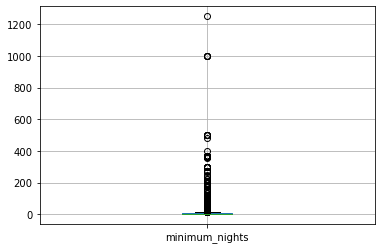

In [48]:
airbnb_cpy_2[['minimum_nights']].boxplot()

In [49]:
airbnb_cpy_2[['minimum_nights']].describe()

,minimum_nights
count,48895.000000
mean,7.029962
std,20.510550
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


In [50]:
airbnb_cpy_2[airbnb_cpy_2['minimum_nights']>11]['minimum_nights'].count()

6607

In [51]:
Q1 = airbnb_cpy_2['minimum_nights'].quantile(0.25)

In [52]:
Q3 = airbnb_cpy_2['minimum_nights'].quantile(0.75)

In [53]:
IQR = Q3-Q1

In [54]:
Upper_lim = Q3 + 1.5*IQR
Upper_lim

11.0

In [55]:
lower_lim = Q1 - 1.5*IQR
lower_lim

-5.0

In [56]:
airbnb_cpy_2[airbnb_cpy_2['minimum_nights']>90]['minimum_nights'].count()

197

In [57]:
airbnb_cpy_2['minimum_nights'] = np.where((airbnb_cpy_2['minimum_nights'] > 90), 90, airbnb_cpy_2['minimum_nights'])

In [58]:
airbnb_cpy_2[airbnb_cpy_2['minimum_nights']>90]['minimum_nights'].count()

0

In [59]:
def stay_type(value):
    if value > 28:
        return 'Long-Term Stay'
    else:
        return 'Short-term Stay'

In [60]:
airbnb_cpy_2['Stay Type']= airbnb_cpy_2['minimum_nights'].map(stay_type)

In [61]:
airbnb_cpy_2

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Property Type,Stay Type
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365,Existing Property,Short-term Stay
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355,Existing Property,Short-term Stay
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NA,0.00,1,365,New Property,Short-term Stay
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194,Existing Property,Short-term Stay
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0,Existing Property,Short-term Stay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NA,0.00,2,9,New Property,Short-term Stay
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,NA,0.00,2,36,New Property,Short-term Stay
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,NA,0.00,1,27,New Property,Short-term Stay
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NA,0.00,6,2,New Property,Short-term Stay


#### Label Encoding of categorical variables

In [62]:
label_encoder = preprocessing.LabelEncoder()

In [63]:
# Encode labels in column 'room_type'
airbnb_cpy_2['room_type']= label_encoder.fit_transform(airbnb_cpy_2['room_type'])
# Encode labels in column 'neighbourhood_group'
airbnb_cpy_2['neighbourhood_group']= label_encoder.fit_transform(airbnb_cpy_2['neighbourhood_group'])
# Encode labels in column 'neighbourhood'
airbnb_cpy_2['neighbourhood']= label_encoder.fit_transform(airbnb_cpy_2['neighbourhood'])
# Encode labels in column 'Property Type'
airbnb_cpy_2['Property Type']= label_encoder.fit_transform(airbnb_cpy_2['Property Type'])
# Encode labels in column 'Stay Type'
airbnb_cpy_2['Stay Type']= label_encoder.fit_transform(airbnb_cpy_2['Stay Type'])

### Clean Data

In [64]:
airbnb_cpy_2.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Property Type,Stay Type
0,2539,2787,1,108,40.64749,-73.97237,1,149.0,1,9,2018-10-19,0.21,6,365,0,1
1,2595,2845,2,127,40.75362,-73.98377,0,225.0,1,45,2019-05-21,0.38,2,355,0,1
2,3647,4632,2,94,40.80902,-73.94190,1,150.0,3,0,NA,0.00,1,365,1,1
3,3831,4869,1,41,40.68514,-73.95976,0,89.0,1,270,2019-07-05,4.64,1,194,0,1
4,5022,7192,2,61,40.79851,-73.94399,0,80.0,10,9,2018-11-19,0.10,1,0,0,1
